# Chapter 6. 평균


## 수학적 평균


$$\mu = \frac{\sum_{i=1}^N X_i}{N}$$

여기서 $X_1, X_2, \ldots , X_N$ 은 관찰값.

In [1]:
import scipy.stats as stats
import numpy as np

x1 = [1, 2, 2, 3, 4, 5, 5, 7]
x2 = x1 + [100]

print('x1 평균 :', sum(x1), '/', len(x1), '=', np.mean(x1))
print ('x2 평균:', sum(x2), '/', len(x2), '=', np.mean(x2))

x1 평균 : 29 / 8 = 3.625
x2 평균: 129 / 9 = 14.3333333333


In [2]:
sum(x1) / len(x1)

3.625

In [3]:
sum(x2) / len(x2)

14.333333333333334

### 가중평균

포트폴리오 가치 계산에 사용되는 가중평균
$$\sum_{i=1}^n w_i X_i $$

여기서, $\sum_{i=1}^n w_i = 1$ 이고,  $w_i = 1/n$ for all $i$.

## 중간값

n 개의 숫자로 이루어진 dataset 을 오름 혹은 내림 차순으로 sort  하여 $(n+1)/2$ 번째의 값. 숫자의 갯수가 짝수인 경우 $n/2$ 과 $(n+2)/2$ 번째 값의 평균으로 정의. x1 dataset 의 경우 4, 5 번째 값의 평균.

중간값은 x2 의 100 과 같은 극단적인 값에 덜 영향을 받는 장점이 있음.

In [6]:
print('Median of x1:', np.median(x1))
print('Median of x2:', np.median(x2))

Median of x1: 3.5
Median of x2: 4.0


## Mode (최빈수)

가장 자주 나타나는 값. mean 이나 median 과 달리 숫자가 아닌 경우에도 적용 가능.

In [7]:
print('One mode of x1:', stats.mode(x1)[0][0])

One mode of x1: 2


x1 의 최빈수는 2 와 5 인데, stats.mode 는 하나의 값만 return 하므로 별개 function 을 직접 작성.

In [8]:
def mode(l):
    # list 에 각 숫자가 몇번 나타나는지 누적한다.
    counts = {}
    for e in l:
        if e in counts:
            counts[e] += 1
        else:
            counts[e] = 1
            
    # 가장 많이 나타난 숫자 출력
    maxcount = 0
    modes = {}
    for (key, value) in counts.items():
        if value > maxcount:
            maxcount = value
            modes = {key}
        elif value == maxcount:
            modes.add(key)
            
    if maxcount > 1 or len(l) == 1:
        return list(modes)
    return 'No mode'
    
print('All of the modes of x1:', mode(x1))

All of the modes of x1: [2, 5]


주식 수익률과 같이 똑 같은 숫자가 반복되기 힘든 경우 histogram 의 bin 을 이용한 최빈 구간 표시

In [16]:
from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2015-01-01')     
price = get_price_data({'q': "SP", 'i': "86400", 'x': "NASD", 'p': "10Y" })['Close'].loc[start : end]
price.index = pd.to_datetime(price.index.date)
price = pd.DataFrame(price.values, columns=['Close'], index=price.index)
returns = price.Close.pct_change()[1:]
print('Mode of returns : ', mode(returns))

Mode of returns :  [0.0]


In [24]:
# 자산의 수익률을 구하고 최빈구간 출력

from googlefinance.client import get_price_data, get_prices_data
import pandas as pd

start = pd.to_datetime('2014-01-01')
end = pd.to_datetime('2015-01-01')     
price = get_price_data({'q': "SP", 'i': "86400", 'x': "NASD", 'p': "10Y" })['Close'].loc[start : end]
price.index = pd.to_datetime(price.index.date)
price = pd.DataFrame(price.values, columns=['Close'], index=price.index)
returns = price.Close.pct_change()[1:]
print('Mode of returns : ', mode(returns))

# 모든 수익률 값이 다르므로 가장 많이 분포된 구간을 구한다.
# np.histogram 을 이용하면 최빈 구간을 구할 수 있다.

hist, bins = np.histogram(returns, 20) # 20 개 bin 으로 구분
print("hist : ", hist)
print("bins : ", bins)
print()
maxfreq = max(hist)
print("maxfreq : ", maxfreq)
print()
# 가장 빈도가 많은 bin 을 구하고 범위를 print
print('Mode of bins:', [(bins[i], bins[i+1]) for i, j in enumerate(hist) if j == maxfreq])

Mode of returns :  [0.0]
hist :  [ 2  0  0  1  2  6  5  9 19 35 39 50 33 19 12  7  5  5  1  1]
bins :  [-0.06682692 -0.06080449 -0.05478205 -0.04875961 -0.04273717 -0.03671474
 -0.0306923  -0.02466986 -0.01864742 -0.01262499 -0.00660255 -0.00058011
  0.00544233  0.01146476  0.0174872   0.02350964  0.02953208  0.03555451
  0.04157695  0.04759939  0.05362183]

maxfreq :  50

Mode of bins: [(-0.00058011162168031261, 0.0054423257833417504)]


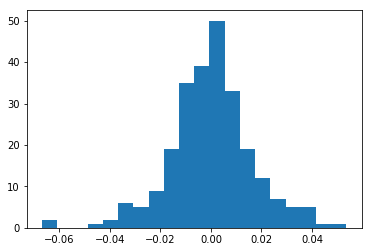

In [28]:
import matplotlib.pyplot as plt
plt.hist(returns, bins=20)
plt.show()

## 기하학적 평균

수학적 평균이 덧셈을 이용하는 반면, 기하학적 평균은 곱셈을 이용한다 :
$$ G = \sqrt[n]{X_1X_1\ldots X_n} $$

이 것은 $X_i \geq 0$ 인 경우, log 를 사용하여 다음과 같이 다시 쓸 수 있다 :
$$ \ln G = \frac{\sum_{i=1}^n \ln X_i}{n} $$

기하학적 평균은 언제나 수학적 평균 보다 같거나 작고 (양수 값들의 경우), 모든 값이 같을 경우에 한하여 동일하다.

In [29]:
# scipy 의 gmean 함수를 이용하여 기하학적 평균을 구한다. 
print('Geometric mean of x1:', stats.gmean(x1))
print('Geometric mean of x2:', stats.gmean(x2))

Geometric mean of x1: 3.09410402498
Geometric mean of x2: 4.55253458762
